**Perceptron Model**

In [33]:
using CSV
using Plots

In [34]:
iris_dat = CSV.read("iris_data.csv")
data = [x for x in zip(iris_dat[1],iris_dat[2],iris_dat[5])]
weights = rand(1)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:2
└ @ Core In[34]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:2
└ @ Core In[34]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:2
└ @ Core In[34]:2


1-element Array{Float64,1}:
 0.17362375185129175

**The Sigmoid Function**
the calculation returns the sum of dot products of the provided x inputs and weights

In [35]:
function z(input,weights)
    input = collect(input[1:2])
    inputs = [1, input[1],input[2]]
    return weights'*inputs
end

z (generic function with 1 method)

In [36]:
z(data[1],weights)

DimensionMismatch: DimensionMismatch("dot product arguments have lengths 1 and 3")

In [37]:
function actual_class(input)
    return input[3]=="setosa" ? 1 : 0
end

actual_class (generic function with 1 method)

We have a iterate the adjusted weights depending on their classification (either right or wrong). This weight will be adjusted up or down, respectively.

In [38]:
N = 1000000
for i in 1:N
    rand_iris = data[rand(1:150)]
    if actual_class(rand_iris)==1 && z(rand_iris,weights) < 0
        weights = weights + [1, rand_iris[1], rand_iris[2]]
    elseif actual_class(rand_iris)==0 && z(rand_iris,weights) >= 0
        weights = weights - [1, rand_iris[1], rand_iris[2]]
    end
end

DimensionMismatch: DimensionMismatch("dot product arguments have lengths 1 and 3")

In [39]:
weights

1-element Array{Float64,1}:
 0.17362375185129175

In [40]:
function predictor(input,weights)
    input = collect(input[1:2])
    inputs = [1, input[1],input[2]]
    return weights'*inputs >=0 ? 1 : 0
end

predictor (generic function with 1 method)

In [41]:
predictor(data[34],weights)

DimensionMismatch: DimensionMismatch("dot product arguments have lengths 1 and 3")

In [42]:
times_right = []
for _ in 1:N
    rand_iris = data[rand(1:150)]
    if predictor(rand_iris,weights)==actual_class(rand_iris)
        append!(times_right,1)
    end
end
sum(times_right)/N

DimensionMismatch: DimensionMismatch("dot product arguments have lengths 1 and 3")

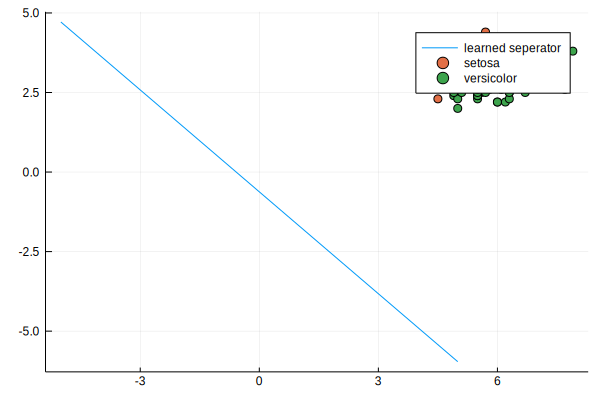

In [43]:
scatter!([x[1:2] for x in data if x[3]=="setosa"],label = "setosa")
scatter!([x[1:2] for x in data if x[3]!="setosa"],label = "versicolor")                

In [44]:
plot!(x -> (-weights[1]-weights[2]*x)/weights[3], label = "learned seperator")

BoundsError: BoundsError: attempt to access 1-element Array{Float64,1} at index [2]